## Image Augmentation:  Things to consider...

Obviously more original images is better, but we're working with some limits here.

- What kind of variance is there beween endoscopy equipment?
    - image quality
    - focus
    - resolution
    - lighting
    - lighting temperature
- How important is color in distinguishing polyps from not?
- What sort of color variation can we expect in the colon?

What we can comfortably do:
- image rotation
- random zoom and crop
- various forms of drop out

I want negative examples, but I'm not seeing any.  There's probably additional datasets available that could be used, but for the sake of time and resources I'm going to keep the dataset on the smaller side.

Are we working with a model with a fixed input size?  Do we need to square them? Should we crop off the black part?

Anyway, I found a nice, MIT licensed library called [Albumentations](https://github.com/albumentations-team/albumentations?tab=readme-ov-file#list-of-augmentations) that looks promising.

In [2]:
import pandas as pd
import numpy as np
import cv2
import albumentations as A
import tifffile as tif

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Motoko\miniconda3\envs\.myenv\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
df = pd.read_csv('../data/stratified-dataset.csv', index_col=0)

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         612 non-null    object
 1   frame_number     612 non-null    int64 
 2   sequence         612 non-null    int64 
 3   img_filepath     612 non-null    object
 4   gt_filepath      612 non-null    object
 5   crossfold_group  612 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 33.5+ KB


,filename,frame_number,sequence,img_filepath,gt_filepath,crossfold_group
0,1.tif,1,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,5
1,2.tif,2,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,1
2,3.tif,3,1,D:/Downloads/Datasets/archive/CVC-ClinicDB/Ori...,D:/Downloads/Datasets/archive/CVC-ClinicDB/Gro...,2


In [4]:
# Test execution on their sample code
i = 0

pth = df.at[i, 'img_filepath']

im = tif.imread(pth)

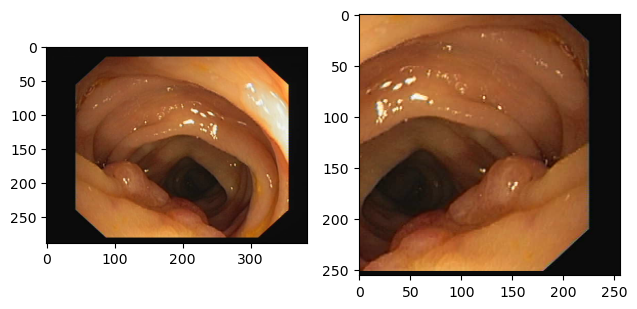

In [9]:
# Test execution on their sample code
i = 0

pth = df.at[i, 'img_filepath']

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

image = tif.imread(pth)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(transformed_image)
plt.tight_layout()
plt.show()

In [10]:
help(A.ShiftScaleRotate)

Help on class ShiftScaleRotate in module albumentations.augmentations.geometric.transforms:

class ShiftScaleRotate(Affine)
 |  ShiftScaleRotate(shift_limit: 'ScaleFloatType' = (-0.0625, 0.0625), scale_limit: 'ScaleFloatType' = (-0.1, 0.1), rotate_limit: 'ScaleFloatType' = (-45, 45), interpolation: 'int' = 1, border_mode: 'int' = 4, value: 'ColorType' = 0, mask_value: 'ColorType' = 0, shift_limit_x: 'ScaleFloatType | None' = None, shift_limit_y: 'ScaleFloatType | None' = None, rotate_method: "Literal['largest_box', 'ellipse']" = 'largest_box', always_apply: 'bool | None' = None, p: 'float' = 0.5)
 |  
 |  Randomly apply affine transforms: translate, scale and rotate the input.
 |  
 |  Args:
 |      shift_limit ((float, float) or float): shift factor range for both height and width. If shift_limit
 |          is a single float value, the range will be (-shift_limit, shift_limit). Absolute values for lower and
 |          upper bounds should lie in range [-1, 1]. Default: (-0.0625, 0.06

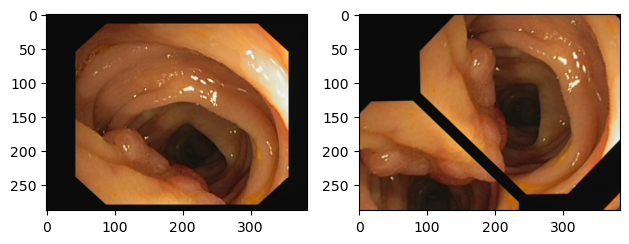

In [12]:
# Test execution on their sample code
i = 0

pth = df.at[i, 'img_filepath']

element = A.ShiftScaleRotate(shift_limit=0.5)

# Declare an augmentation pipeline
transform = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.25, p=1)
])

image = tif.imread(pth)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(transformed_image)
plt.tight_layout()
plt.show()